<div style="text-align: left"><H1><font color=darkblue> Determining the Future Value (FV) based on a Value Invested  </font></H1></div>

<div style="text-align: left"><H3><font color=black>Produced By: Driss Baraket </font></H3></div>
Date: 13-Aug-2021

### Import Libraries

In [5]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pprint

In [109]:
# Create two Dictionaries. One for all the data and one for 'Years' divisble by five.
compound_interest_dict = []
mod5_dict = []

# Create lists to append our values 
years_list = []
beginning_vals = []
compound_interest_list = []

mod_5_beginning_vals = []
mod5_periods_list = []
mod5_compound_interest_list = []

## User Input 
print("-- Time Value of Money --")

# Ask an input 
payment = int(input("How much money (in EXACT U.S. dollars ($)) are you going to invest annually in the S&P 500 Index? "))
beginning_vals.append(int(payment))

years = int(input("How many years ? "))

interest_rate = int(input("What percentage is your interest rate? *please write whole number (i.e. 7, 10, 13)"))

# Calculate Interest and End Value
simple_interest = round(interest_rate / 100 * payment, 2)
ioi = round(0, 2)
compound_interest = simple_interest + ioi
end_value = payment + compound_interest

# Loop through range of years that were inputted
for i in range(1, (int(years) + 1)):
    # Get info for base year
    if i == 1:
        first_year = {'Year' : i, 
                      'Beginning Value' : 0,
                      'Payment' : payment,
                      'Simple Interest' : simple_interest,
                      'Interest on Interest' : ioi,
                      'Total (Compound Interest)' : compound_interest,
                      'End Value' : end_value
                       }
        # Append first year to dictionary with all data
        compound_interest_dict.append(first_year)
        # Get year and append to appropriate list
        year = first_year.get('Year')
        years_list.append(int(year))
        # Get 'Total (Compound Interest)' and append to appropriate list
        compound_interest = first_year.get('Total (Compound Interest)')
        compound_interest_list.append(int(compound_interest))
        
    # Get information for every other year
    else:
        beginning_val = compound_interest_dict[i - 2].get('End Value')
        beginning_vals.append(beginning_val)
        
        pv = round(beginning_val + payment, 2)
        ioi = round(pv * (interest_rate/100) - simple_interest, 2)
        compound_interest = round(simple_interest + ioi, 2)
        end_value = round(beginning_val + payment + compound_interest, 2)
        
        years = {
            'Year' : i,
            'Beginning Value' : beginning_val,
            'Payment' : payment,
            'Present Value' : pv,
            'Simple Interest' : simple_interest,
            'Interest on Interest' : ioi,
            'Total (Compound Interest)' : compound_interest,
            'End Value' : end_value
        }
        
        compound_interest_dict.append(years)
        
        year = years.get('Year')
        years_list.append(int(year))
        
        compound_interest = years.get('Total (Compound Interest)')
        compound_interest_list.append(int(compound_interest))
        
        # Additionally, append specific data that is divisble by 5
        if i % 5 == 0:
            
            mod_5_beginning_val = compound_interest_dict[i - 2].get('End Value')
            mod_5_beginning_vals.append(int(mod_5_beginning_val))
            
            mod5_dict.append(years)
            
            mod5_period = years.get('Year')
            mod5_periods_list.append(int(mod5_period))
            
            mod5_compound_interest = years.get('Total (Compound Interest)')
            mod5_compound_interest_list.append(int(mod5_compound_interest))

# Print out the data in the main dictionary to view all the data
pprint.pprint(compound_interest_dict)

-- Time Value of Money --
How much money (in EXACT U.S. dollars ($)) are you going to invest annually in the S&P 500 Index? 100000
How many years ? 30
What percentage is your interest rate? *please write whole number (i.e. 7, 10, 13)5
[{'Beginning Value': 0,
  'End Value': 105000.0,
  'Interest on Interest': 0,
  'Payment': 100000,
  'Simple Interest': 5000.0,
  'Total (Compound Interest)': 5000.0,
  'Year': 1},
 {'Beginning Value': 105000.0,
  'End Value': 215250.0,
  'Interest on Interest': 5250.0,
  'Payment': 100000,
  'Present Value': 205000.0,
  'Simple Interest': 5000.0,
  'Total (Compound Interest)': 10250.0,
  'Year': 2},
 {'Beginning Value': 215250.0,
  'End Value': 331012.5,
  'Interest on Interest': 10762.5,
  'Payment': 100000,
  'Present Value': 315250.0,
  'Simple Interest': 5000.0,
  'Total (Compound Interest)': 15762.5,
  'Year': 3},
 {'Beginning Value': 331012.5,
  'End Value': 452563.12,
  'Interest on Interest': 16550.62,
  'Payment': 100000,
  'Present Value': 4310

In [110]:
# DataFrame that displays the data from the main dictionary
FV_amount = compound_df['End Value'].tail(1).values.astype(int)
compound_df = pd.DataFrame(compound_interest_dict, columns = ['Year', 
                                                              'Beginning Value', 
                                                              'Payment',
                                                              'Simple Interest', 
                                                              'Interest on Interest', 
                                                              'Total (Compound Interest)',
                                                              'End Value']).set_index("Year")

print(f'The future value amount of the ${payment: .2f} at a yearly rate of {simple_interest}% is ${FV_amount:}')

The future value amount of the $ 100000.00 at a yearly rate of 5000.0% is $[6976078]


In [111]:
# Create a new DataFrame to view 'Payment', 'Total (Compound Interest)', and 'Beginning Value' data
new_compound_df = pd.DataFrame(compound_df, columns = ['Beginning Value',
                                                       'Payment',
                                                       'Total (Compound Interest)'])
new_compound_df.tail()

,Beginning Value,Payment,Total (Compound Interest)
Year,,,
26,5011345.33,100000,255567.27
27,5366912.60,100000,273345.63
28,5740258.23,100000,292012.91
29,6132271.14,100000,311613.56
30,6543884.70,100000,332194.24


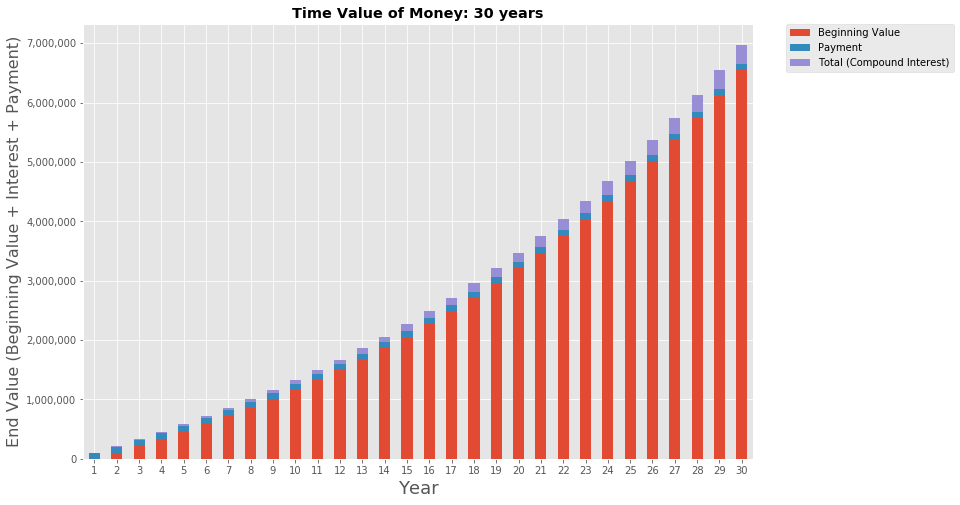

In [112]:
# Plot DataFrame as stacked bar chart using MatPlotlib
plt.style.use('ggplot')
ax = new_compound_df.plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# Format y-axis tickers
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Plot legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Set x and y labels
ax.set_ylabel("End Value (Beginning Value + Interest + Payment)", fontsize=16)
ax.set_xlabel("Year", fontsize=18)
# Set Title
plt.title('Time Value of Money: ' + str(int(year)) + ' years', fontsize="x-large", fontweight = "bold")

# Save Image
# # plt.savefig('../Images/future_value_total_value.png')

# Plot graph
plt.show()

In [113]:
# Create new DataFrame using the dictionary that is divisble by five
mod5_df = pd.DataFrame(mod5_dict, columns = ['Year', 
                                             'Beginning Value', 
                                             'Simple Interest', 
                                             'Interest on Interest', 
                                             'Total (Compound Interest)',
                                             'End Value']).set_index("Year")
mod5_df

,Beginning Value,Simple Interest,Interest on Interest,Total (Compound Interest),End Value
Year,,,,,
5,452563.12,5000.0,22628.16,27628.16,580191.28
10,1157789.24,5000.0,57889.46,62889.46,1320678.70
15,2057856.33,5000.0,102892.82,107892.82,2265749.15
20,3206595.38,5000.0,160329.77,165329.77,3471925.15
25,4672709.84,5000.0,233635.49,238635.49,5011345.33
30,6543884.70,5000.0,327194.24,332194.24,6976078.94


In [114]:
# Create a revised DataFrame to view 'Payment', 'Total (Compound Interest)', and 'Beginning Value' data divisble by five
revised_mod5_df = pd.DataFrame(mod5_dict, columns = ['Year', 
                                                     'Beginning Value',
                                                     'Payment',
                                                     'Total (Compound Interest)']).set_index("Year")
revised_mod5_df

,Beginning Value,Payment,Total (Compound Interest)
Year,,,
5,452563.12,100000,27628.16
10,1157789.24,100000,62889.46
15,2057856.33,100000,107892.82
20,3206595.38,100000,165329.77
25,4672709.84,100000,238635.49
30,6543884.70,100000,332194.24


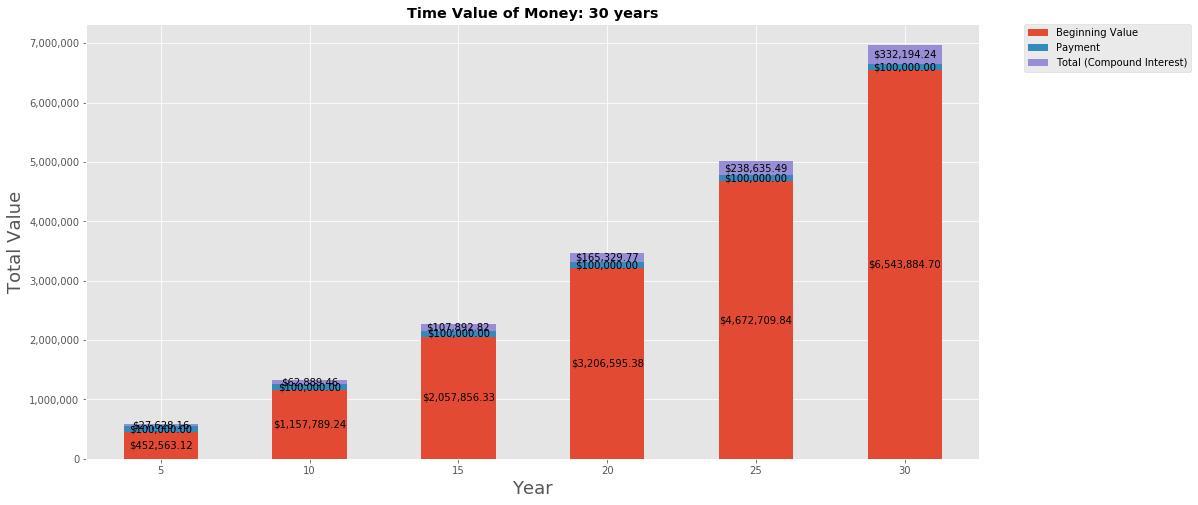

In [115]:
# Plot DataFrame as stacked bar chart using MatPlotlib
plt.style.use('ggplot')
ax = revised_mod5_df.plot(stacked=True, kind='bar', figsize=(16, 8), rot='horizontal')

# Format y-axis tickers 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'${height:,.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
# Plot legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
# Set x and y labels
ax.set_ylabel("Total Value", fontsize=18)
ax.set_xlabel("Year", fontsize=18)
# Set title
plt.title('Time Value of Money: ' + str(int(year)) + ' years', fontsize="x-large", fontweight = "bold")

# Save Image
# # plt.savefig('../Images/future_value_mod_five.png')

# Plot graph
plt.show()

### Comparison between the built in Model and TVM FV formula

In [116]:
# Make variables for interest rate, years, payment, present value
interest_rate = 0.05
years = 30
pmt = -100000
pv = 0

# Use Numpy Financial to calculate Future Value 
fv = npf.fv(interest_rate, years, pmt, pv, 1)
fv

6976078.987816404